# Self-Driving Car Engineer Nanodegree


## Project: **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images). Check out the video clip "raw-lines-example.mp4" (also contained in this repository) to see what the output should look like after using the helper functions below. 

Once you have a result that looks roughly like "raw-lines-example.mp4", you'll need to get creative and try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines.  You can see an example of the result you're going for in the video "P1_example.mp4".  Ultimately, you would like to draw just one line for the left side of the lane, and one for the right.

In addition to implementing code, there is a brief writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) that can be used to guide the writing process. Completing both the code in the Ipython notebook and the writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/322/view) for this project.

---
Let's have a look at our first image called 'test_images/solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to display the image.

**Note: If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".**

---

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  You  are also free to explore and try other techniques that were not presented in the lesson.  Your goal is piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).  Once you have a working pipeline, try it out on the video stream below.**

---

<figure>
 <img src="examples/line-segments-example.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above) after detecting line segments using the helper functions below </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="examples/laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your goal is to connect/average/extrapolate line segments to get output like this</p> 
 </figcaption>
</figure>

**Run the cell below to import some packages.  If you get an `import error` for a package you've already installed, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt.  Also, consult the forums for more troubleshooting tips.**  

## Import Packages

In [4]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

## Read in an Image

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


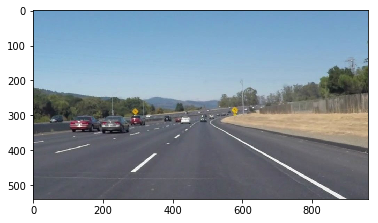

In [5]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteCurve.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

## Ideas for Lane Detection Pipeline

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images
`cv2.cvtColor()` to grayscale or change color
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

## Helper Functions

Below are some helper functions to help get you started. They should look familiar from the lesson!

In [20]:
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


# def draw_lines(img, lines, color=[255, 0, 0], thickness=5):
#     """
#     NOTE: this is the function you might want to use as a starting point once you want to 
#     average/extrapolate the line segments you detect to map out the full
#     extent of the lane (going from the result shown in raw-lines-example.mp4
#     to that shown in P1_example.mp4).  
    
#     Think about things like separating line segments by their 
#     slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
#     line vs. the right line.  Then, you can average the position of each of 
#     the lines and extrapolate to the top and bottom of the lane.
    
#     This function draws `lines` with `color` and `thickness`.    
#     Lines are drawn on the image inplace (mutates the image).
#     If you want to make the lines semi-transparent, think about combining
#     this function with the weighted_img() function below
#     """
#     for line in lines:
#         for x1,y1,x2,y2 in line:
#             rm=[]
#             lm=[]
#             rc=[]
#             lc=[]
#             ry=[]
#             ly=[]
#             slope=(y2-y1)/(x2-x1)
#             center=[(x1+x2)/2,(y1+y2)/2]
#             if slope>=0:
#                 rm.append(slope)
#                 rc.extend(center)
#                 ry.extend([y1,y2])
#             else :
#                 lm.append(slope)
#                 lc.extend(center)
#                 ly.extend([y1,y2])
                
#     r_slope=np.sum(rm)/len(rm)
#     l_slope=np.sum(lm)/len(lm)
    
#     r_center=np.divide(np.sum(rc,axis=0),len(rc))
#     l_center=np.divide(np.sum(lc,axis=0),len(lc))
    
#     rx_bottom = r_center[0][0] - (r_center[0][1] - 540) / r_slope
#     rx_top = r_center[0][0] - (r_center[0][1] - 270) / r_slope
# #     r_b=int(r_center(1)-r_slope*r_center(0))
# #     l_b=int(l_center(1)-l_slope*l_center(0))
#     cv2.line(img, (rx_bottom.astype(int), 540), (rx_top.astype(int), 270) ,color,thickness)
#     #cv2.line(img,((max(ry)-r_b)/r_slope,max(ry)),((min(ry)-r_b)/r_slope,min(ry)),color, thickness)

def draw_lines(img, lines, color=[255, 0, 0], thickness=10):
    #right/left centers list
    #right/left slope list
    rm = []
    lm = []
    rc_x = []
    rc_y = []
    lc_x = []
    lc_y = []
#     ry=[]
#     ly=[]
    
    for line in lines:
        for x1, y1, x2, y2 in line:
            slope = (y2 - y1) / (x2 - x1)
            center_x= (x2 + x1) / 2
            center_y= (y2 + y1) / 2
            if slope > 0.50 and slope<1.0:
                rm.append(slope)
#                 ry.extend([y1,y2])
                rc_x.append(center_x)
                rc_y.append(center_y)
            elif slope < -0.5 and slope>-1.0:
                lm.append(slope)
#                 ly.extend([y1,y2])
                lc_x.append(center_x)  
                lc_y.append(center_y)                                
            
            
    r_slope = np.sum(rm) / len(rm)
    l_slope = np.sum(lm) / len(lm)
    
    r_center_x= np.divide(np.sum(rc_x), len(rc_x))
    r_center_y= np.divide(np.sum(rc_y), len(rc_y))
    l_center_x= np.divide(np.sum(lc_x), len(lc_x))
    l_center_y= np.divide(np.sum(lc_y), len(lc_y))

    line_height = 320

    draw_line_from_slope_and_center(r_center_x, r_center_y, line_height, r_slope, img, color, thickness)
    draw_line_from_slope_and_center(l_center_x, l_center_y, line_height, l_slope, img, color, thickness)
#     r_bottom_y=np.max(ry)
#     r_bottom_x=r_center_x-(center_y-r_bottom_y)/r_slope
# #     r_top_y=np.min(ry)
#     r_top_x=r_center_x-(center_y-r_top_y)/r_slope
    
#     cv2.line(img,(r_bottom_x.astype(int),r_bottom_y),(r_top_x.astype(int),r_top_y),color,thickness)
    
#     l_bottom_y=np.max(ly)
#     l_bottom_x=l_center_x-(center_y-l_bottom_y)/l_slope
#     l_top_y=np.min(ly)
#     l_top_x=l_center_x-(center_y-l_top_y)/l_slope
    
#     cv2.line(img,(l_bottom_x.astype(int),l_bottom_y),(l_top_x.astype(int),l_top_y),color,thickness)
#     print(r_bottom_y,r_top_y,l_bottom_y,l_top_y)
    
#     lx_bottom = l_center[0][0] - (l_center[0][1] - 540) / r_slope
#     lx_top = l_center[0][0] - (l_center[0][1] - 270) / r_slope     
    return img

def draw_line_from_slope_and_center(center_x, center_y, line_height, slope, img, color, thickness):

    
    x_bottom = (center_x - (center_y - 540) / slope)
    x_top = (center_x - (center_y - line_height) / slope )
    print(x_bottom,x_top,slope)
#     x_bottom  = max(x_bottom,1.)
#     x_top = max(x_top, 1.)
# #     assert x_bottom >= 0
# #     assert x_top >= 0

    cv2.line(img, (x_bottom.astype(int), 540), (x_top.astype(int), line_height) ,color,thickness) 


def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., γ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + γ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, γ)

## Test Images

Build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

In [21]:
import os
os.listdir("test_images/")

['solidYellowLeft.jpg',
 'solidYellowCurve2.jpg',
 'solidWhiteCurve.jpg',
 'solidYellowCurve.jpg',
 'solidWhiteRight.jpg',
 'whiteCarLaneSwitch.jpg']

## Build a Lane Finding Pipeline



Build the pipeline and run your solution on all test_images. Make copies into the `test_images_output` directory, and you can use the images in your writeup report.

Try tuning the various parameters, especially the low and high Canny thresholds as well as the Hough lines parameters.

887.6793919581703 501.3648746805467 0.5694841642254355
188.94065235756705 462.68564861539704 -0.8036676578840198


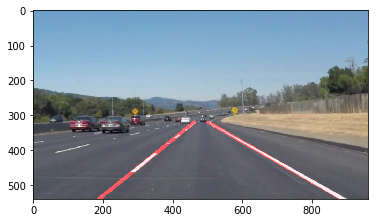

In [22]:
# TODO: Build your pipeline that will draw lane lines on the test_images
# then save them to the test_images_output directory.
img_gray=grayscale(image)
#plt.imshow(img_gray)
img_gaussian_blur=gaussian_blur(img_gray,5)
#plt.imshow(img_gaussian_blur)
img_canny=canny(img_gaussian_blur,60,150)
#plt.imshow(img_canny)
imshape=image.shape
vertices=np.array([[(0,imshape[0]),(430,310),(510,310),(imshape[1],imshape[0])]],dtype=np.int32)

roi=region_of_interest(img_canny,vertices)
#plt.imshow(roi)
lines_image=hough_lines(roi,1,np.pi/180,25,50,20)
img_addweight=weighted_img(image,lines_image)
plt.imshow(img_addweight)


## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

**Note: if you get an import error when you run the next cell, try changing your kernel (select the Kernel menu above --> Change Kernel). Still have problems? Try relaunching Jupyter Notebook from the terminal prompt. Also, consult the forums for more troubleshooting tips.**

**If you get an error that looks like this:**
```
NeedDownloadError: Need ffmpeg exe. 
You can download it by calling: 
imageio.plugins.ffmpeg.download()
```
**Follow the instructions in the error message and check out [this forum post](https://discussions.udacity.com/t/project-error-of-test-on-videos/274082) for more troubleshooting tips across operating systems.**

In [23]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [17]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    
    img_gray=grayscale(image)
    #plt.imshow(img_gray)
    img_gaussian_blur=gaussian_blur(img_gray,5)
    #plt.imshow(img_gaussian_blur)
    img_canny=canny(img_gaussian_blur,60,150)
    #plt.imshow(img_canny)
    imshape=image.shape
    vertices=np.array([[(0,imshape[0]),(450,320),(500,320),(imshape[1],imshape[0])]],dtype=np.int32)

    roi=region_of_interest(img_canny,vertices)
    #plt.imshow(roi)
    lines_image=hough_lines(roi,1,np.pi/180,25,50,20)
    img_addweight=weighted_img(image,lines_image)

    return img_addweight

Let's try the one with the solid white lane on the right first ...

In [18]:
white_output = 'test_videos_output/solidWhiteRight.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
#clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

861.9088013806816 503.4800611273573 0.6137900656194928
163.21507874047717 454.302516927252 -0.7557866508098439
[MoviePy] >>>> Building video test_videos_output/solidWhiteRight.mp4
[MoviePy] Writing video test_videos_output/solidWhiteRight.mp4



  2%|▏         | 5/222 [00:00<00:04, 49.62it/s]

861.9088013806816 503.4800611273573 0.6137900656194928
163.21507874047717 454.302516927252 -0.7557866508098439
856.1279056358887 506.35444215055236 0.6289785331562843
155.95142158133996 460.2964196796813 -0.7228638596810866
861.5751437708311 503.6877627929307 0.614718516754814
156.29379054178037 457.8136424652731 -0.7296368666824051
858.6280574666864 502.97373857302307 0.6185781763718087
158.0553829231948 456.5954953341686 -0.7369193982788664
860.7553238392591 503.7143243967919 0.616175734281324
149.80913503787292 459.3411123361492 -0.7107504753474954
861.1526304137251 503.57632885281066 0.6152533012944154
154.34176516942472 457.2448384554768 -0.7263049450549449
864.3549412214842 505.57461393504343 0.6131885816146151
156.26994572448314 457.8052881670926 -0.7295993836671802
868.3973340263728 506.71035951795426 0.6082607765983546
146.71930020478845 457.02819084905923 -0.7089709854694486
860.4219022061757 502.59179575166513 0.6148169090069777
157.0406786625938 457.1238967791427 -0.7331299


  6%|▌         | 13/222 [00:00<00:03, 55.08it/s]

842.9217421502195 496.7249145937618 0.6354766493754841
151.42599502315414 464.9816874739236 -0.7016297432856895



  9%|▉         | 21/222 [00:00<00:03, 60.12it/s]

844.9247321108096 500.89327173391587 0.6394764006727333
152.98908713232737 456.94124854312804 -0.7237981101330722
847.2802152450179 503.7852583085834 0.6404751963817396
147.09515974466555 457.16485745858824 -0.7095178974985714
847.2512948873343 507.830566958913 0.6481631258724854
147.8643517047265 451.15087796552325 -0.7253866589866954
847.8145542259604 509.8175917973299 0.6508934234770052
147.85083284280194 453.9937286221105 -0.7186186680568704
843.3937079766464 507.23539354025263 0.6544535433218543
134.76873654980915 455.5493543908365 -0.6858269725916786
847.08908380032 503.819831316301 0.6408963180011066
147.8402845061271 457.042023725983 -0.7115095812691093
844.9566238699472 501.4468161641207 0.6404475070720622
144.23343464689663 460.3181927764077 -0.6960158449331436
845.3963074835765 501.1004120665309 0.6389852534649418
155.2074307126453 461.95641784085086 -0.7171987821692501
846.4566915030268 501.3529144576996 0.6374894006770154
147.3592673849056 462.1280855736252 -0.698925647292


 13%|█▎        | 29/222 [00:00<00:03, 62.59it/s]

846.0470531524297 501.1918669340618 0.6379489385457362
154.54424464278844 457.80454229039265 -0.7254493967939228
845.016459205956 501.4873029222432 0.6404114351746815
155.906015037594 460.26691729323306 -0.7228260869565217



 17%|█▋        | 37/222 [00:00<00:02, 65.85it/s]

848.282988679648 503.77543875085155 0.6385926811922412
155.78201737816403 458.9780884019645 -0.7256030701754387
846.797317723951 502.9941802859724 0.6399010830425816
143.97495343773147 458.9168470681086 -0.6985415546468928
851.755011764697 501.34412459017506 0.6278343740228287
155.45076282940352 457.91262135922324 -0.7273644388398486
848.4047929566079 504.6285341663562 0.6399511146411906
145.2013832034861 457.79137396012146 -0.7037973271872271
850.1478382759416 504.28245022464137 0.636085620592277
151.65089132271876 457.3902491353299 -0.719567155416212
847.5241416349565 502.6874845984873 0.6379832175925926
158.52539560180364 456.53809580165887 -0.7382235718560388
847.1978714690568 501.59160720036755 0.6365625358832109
150.43562189387188 460.62314479390545 -0.7092483860832179
846.90083764609 501.43845673055944 0.6368276609944178
158.0201631881829 457.996242764718 -0.7333918101422144
848.7175405903013 501.8552935828678 0.6342575529567082
152.5215058393873 459.1360083380299 -0.71751335376


 19%|█▉        | 43/222 [00:00<00:02, 63.58it/s]

842.4615058823315 505.8482531946787 0.6535690387809552
152.50816766515538 455.9925216874623 -0.7249138121427815



 22%|██▏       | 49/222 [00:00<00:03, 53.64it/s]

845.2029560716205 506.3305855022792 0.649211972136816
147.05763439678287 455.6625542077221 -0.7128855889101791
845.8170018571539 505.97034092339334 0.6473507769519623
144.29935641797078 455.4429359488199 -0.7070690654511402
845.3093322213577 506.3063680287054 0.6489618771444604
152.2921875197066 451.767816165458 -0.7346173743581558
850.8038592443145 506.6156056153434 0.6391850903696328
148.11940137290688 454.0216226795632 -0.7191840551542045
849.3673644633983 504.0074341682845 0.6370165751771134
148.21180952351932 454.9813698932627 -0.7171506838385082
843.9181156517677 505.11153276207835 0.6493380327017697
143.6780179226056 458.6598337600577 -0.6984530183594219
844.3133053545686 505.13502058613756 0.6486264300505021
146.03779249429056 457.9200369132611 -0.7053944363195633


844.9560316053485 508.6436859406318 0.6541538032603978
145.20771355211053 457.6773275980379 -0.7040684601340595
846.2640242909875 505.76756793682705 0.6461153879709439
143.7796637023604


 25%|██▍       | 55/222 [00:00<00:03, 48.22it/s]

 455.1841605217677 -0.7064766316704301
846.5656608111198 505.2759367971913 0.6446136069160451
139.9435257152307 454.46312220936 -0.6994794679005205
847.7294040310193 504.5744572846703 0.6411098021052809
128.88134923086426 455.3952183851239 -0.6737845487845487
846.4567185651814 504.9546024745526 0.6442126992314617
135.57946053246144 455.2525105091079 -0.688203150112504
844.6133556279532 500.58170861538866 0.6394760537595696
124.83786678951861 457.9991815892422 -0.6603407725541325
844.0300861093751 499.2186917133205 0.6380299594952052
137.8346252916673 458.9117332449575 -0.6851936639220174
841.9820158350421 500.4646130761766 0.6441838636121713
136.43819478924593 461.33653382283933 -0.6771348867291461
842.1110448730036 499.71679412604306 0.6425341533044211
132.88920707962924 459.56246304470244 -0.6734558032614756
839.1427326219895 500.601371376957 0.6498467401174253
138.830784011578 458.22519551621167 -0.6888035359278925



 27%|██▋       | 61/222 [00:01<00:03, 49.51it/s]

835.960610436823 501.5855515943814 0.657943809450407
137.1687762913117 459.7306194979516 -0.6820397534095916



 30%|███       | 67/222 [00:01<00:03, 45.48it/s]

837.5463353349767 501.91563621142825 0.6554823518066092
137.05038294686864 461.38470947367955 -0.6783124140941456
835.8024155888347 500.97948393660283 0.6570637169753527
133.59555612039483 459.8400146421707 -0.6743409558489578
832.479623811516 500.2817149297857 0.662255824368614
133.1710227436097 461.0930446533828 -0.6708912037037038
835.1512157381712 500.84746317305235 0.6580841474615106
134.64944631381502 458.9321692739799 -0.6784203549043991
835.8457774037201 501.51100363920415 0.6580230872273967
129.46626132899257 458.9306086272779 -0.6677505526897568
837.6228777658 502.730629637226 0.6569277169877522
123.53426869046791 458.03148976313315 -0.6577035208080483
835.9977614968453 503.6125703116685 0.6618826765884244
120.71221314636767 456.7214695997135 -0.6547438672438672
835.2067953578505 500.4343416632536 0.6571627909406772
135.54520007866853 454.45811131591347 -0.6898435035022402


838.0517912935208 502.2824096506903 0.6552116185329299
130.37081714958867 457.38652165825874 -0.6727505650853757



 35%|███▍      | 77/222 [00:01<00:03, 44.77it/s]

841.9823722025158 501.3183037431829 0.6457974889895463
129.11850114892164 456.0789125439471 -0.6728643356586722
836.6252121475079 502.39037934083194 0.658219845467901
128.81913158918667 458.2843155333456 -0.6677488569999791
836.0711924071428 501.75374844674235 0.6580571967583564
124.4401589845499 458.75330383080296 -0.6580656590729497
834.2054896611569 501.6999722050051 0.6616431561290165
129.24539221887355 457.7145983971496 -0.6697735917460568
833.8635329158272 501.02664604940605 0.6609844301551034
130.71241906132153 456.4315585483434 -0.6754285312999416
833.1703686600581 501.2506609786119 0.6628108994695214
125.42384699639328 454.9728328179507 -0.6675790533888171
833.0514123639772 500.3354201238586 0.6612246033584935
119.56674355541327 456.23215380659934 -0.6534677852288359
827.0081208652404 498.55536467936014 0.6698071362065116
123.12537252777025 454.7644947168789 -0.663371675053918



 37%|███▋      | 82/222 [00:01<00:03, 41.84it/s]

824.0934121219881 500.01196838370436 0.6788417055364142
135.73809189990925 453.4553524650044 -0.6924395596534659
825.4367221817422 499.8153825034468 0.6756313950963831
130.20883766500816 454.46530292156217 -0.6784752921608963
828.1608098515994 500.00878522260086 0.6704209740857981
120.92859158639374 454.80690284467187 -0.6589227050145664
827.6005729147458 500.31902098598135 0.6722040967585146
126.99245283959726 453.0315773989099 -0.6747656444525199
833.4800563963237 500.46835564450015 0.6606374475831246
125.505641943847 454.14656126413115 -0.6694236385871177
833.0236090174667 499.33081683733883 0.6592890381679078
113.53043110886372 458.7243428481708 -0.637322943766591
829.3384651963478 498.2094331335875 0.6643935707766707
120.16174944129304 454.1661109030342 -0.6586740335880317
823.750696258404 502.410383341229 0.68463243221122
118.47095390939924 459.9812793115501 -0.6441972134837667
824.4365818356345 503.08339053599593 0.6846049952398511
122.84385744625243 457.6871673406043 -0.6570237


 41%|████▏     | 92/222 [00:01<00:03, 37.94it/s]

823.552653886497 504.1505662056971 0.6887869819431516
124.81802407648138 455.6526045193767 -0.6649848988140274
821.76817532505 501.41179616391213 0.6867351933995387
126.27177469303348 458.98883382499764 -0.6612224830730495
824.302281201909 502.6622916046938 0.6839945501661736
122.43532633876924 457.1583626352698 -0.6572598122739365
822.0079745915302 502.3573020880041 0.6882513284797582
124.2880493794587 459.9441588951016 -0.6554327294011227
822.4967867979244 501.5021981948189 0.6853698093708973
125.72880766938408 459.2702407289551 -0.6595882196162047
819.6598392513376 503.5718989537915 0.6960088378977866
122.87598296232017 459.23504433924097 -0.6540629501682134
819.4076378741198 504.89986724133985 0.6995057691495722
125.78671300937319 461.33626055199466 -0.6556408781092325



 45%|████▌     | 100/222 [00:02<00:03, 37.12it/s]

821.4202934402208 503.8067909511382 0.6926657660203289
119.27008494115131 463.9197146805036 -0.6383294250638804
824.2456884553553 506.39400537397114 0.6921467203421106
126.34844027512551 456.0115571647135 -0.6673479340841251
824.9557294679323 507.10250036921053 0.6921433537856883
127.08292013095044 457.2985814476191 -0.666231271777947
822.3710191255713 508.95908814207587 0.7019515795382577
125.11294336931834 457.968510614676 -0.6609473346673258
822.3478912191099 509.76776401494317 0.7038195357067709
124.99251562568602 456.468645687364 -0.6636978655418249
823.2359312971515 510.43059658097025 0.7033128133815663
127.0043761716733 454.1466035791677 -0.67249037748332
824.3377581590679 510.0923396236825 0.7000897611343442
130.0006187129266 457.0859902793168 -0.6726072735886492
819.2402146833638 509.759067569219 0.7108672113033698
137.80576507045555 459.51033382661643 -0.6838572447093568



 50%|████▉     | 110/222 [00:02<00:03, 36.73it/s]

822.7466637736123 505.5020929249225 0.6934712843515586
126.95521273674194 461.5883096959176 -0.6574364639933971
825.8815489126308 506.1166580456868 0.6880054886686832
127.03853040621323 463.63118536855006 -0.6536090338174996
829.4286765788396 507.35239742293555 0.6830680004642843
122.30738139653971 461.9759866856871 -0.6476901208244491
828.5966578485646 507.9600902264528 0.6861350894302309
142.36798499309236 457.5373971359599 -0.6980372825655845
831.6801614233991 509.989400214186 0.6838865970941639
127.70853837969824 462.4590225235845 -0.6572059202920737
831.9131959406425 510.5946963324408 0.684678909767897
131.43321222506492 461.91984880701 -0.6656850100668151
829.2716266665002 509.4866417402327 0.6879622570482012
131.75833597376868 463.46315562698817 -0.6632402876448971
832.1676518274945 508.39475100595746 0.6794886151428206
134.04118901094992 461.0368458756805 -0.6727918104765781



 52%|█████▏    | 115/222 [00:02<00:02, 38.19it/s]

829.0637980175463 508.52789021579565 0.686350560562059
138.95589081183098 463.78353575902264 -0.6772822554427784
829.2307660500474 509.586341689606 0.6882647818437181
134.99970896166374 466.06248444783176 -0.6645265378353953
832.5515779294843 509.92265198947723 0.6818979400529915
133.60582818512137 460.8619413014955 -0.6722563496369791
835.0112035804252 511.21436596067474 0.6794383837014372
138.153910757113 460.20649145470986 -0.6831182644879257
838.738789324851 509.42004652418206 0.6680457909228759
130.0376201813731 460.0911617613088 -0.6665585194053074
836.5829238010631 512.9487110155983 0.6797797986390168
128.84128144607854 460.7973890389133 -0.6627382204090788
837.5600935238712 509.3165519340266 0.6702340552823433
128.05077299363398 460.85459727410574 -0.6610500960307298
841.1665106438974 507.71178893216666 0.6597597385056326
130.85602407933908 461.49641714089125 -0.6653754490276229



 56%|█████▌    | 124/222 [00:02<00:02, 38.41it/s]

837.2802168526606 510.6371397628752 0.6735180245057756
132.1710869515341 462.396050422096 -0.6662125046146369
841.8715688976235 505.75198206715936 0.6545289492782997
138.40490306912147 460.8352455552538 -0.6823179180460108
846.2944536609525 503.8946386899228 0.6425237116983084
139.1307964209017 463.5604577641746 -0.6781130895649586
843.7429023729807 507.6923995564444 0.6546635049080911
143.177880004707 460.66108821726385 -0.6929500342352239
844.8308677706252 505.04205657799656 0.6474609897477772
138.48360472588735 462.57332950525165 -0.6788243599817084
844.442685413897 505.5802220327465 0.649230952891189
137.82475632395122 464.4912475491484 -0.6734697494526198
847.8926567961212 507.31617322628256 0.6459635665211358
137.7392700414513 461.4810755559083 -0.6795538798283983
842.5213527652023 507.31198056813093 0.6563062320067256
145.3299978965714 463.99582319180263 -0.6903783918347025



 59%|█████▉    | 132/222 [00:02<00:02, 36.56it/s]

848.6784935794243 505.2784109280927 0.6406521463286168
143.1743843303487 463.6086318004044 -0.6865683107750797
848.5403883158648 505.15016875141566 0.6406705475742572
143.7482859045375 463.9420500362211 -0.6870839617898441
848.2126607325124 505.22437711643033 0.6414213269344592
137.08894816717714 464.5847394433778 -0.6717643580782943
849.2257896628296 505.0460841587195 0.6392009653148267
149.38718879840508 463.06362880052393 -0.7013596558240521
850.7535257746105 504.815358690341 0.6359517998671961
152.35337002155907 465.0913707023715 -0.7034642401021712
850.3688691660443 504.6780563637212 0.6364068463855963
150.41744595358415 466.81513409178234 -0.6953274573356143
848.4440067286648 504.7653301564237 0.6401328188126799
151.18556990325303 466.4172585425162 -0.6978993798169765
847.9172814050476 504.2334656036355 0.6401232466736833
152.28851010342893 464.0854288655697 -0.7055874730046018



 63%|██████▎   | 140/222 [00:03<00:02, 35.96it/s]

847.7218194350047 504.3788209362 0.6407586610529525
147.73228971563947 462.8210304892985 -0.6982159992763273
855.8377540381141 510.40880316778987 0.636889292127078
148.48655815413247 462.3788219447052 -0.7008774199888623
854.4965424215483 510.258574235174 0.6390927797972872
144.01075549488328 457.78844609329315 -0.7011333392773555
860.2201607216349 512.1236526520931 0.6320086381218425
153.537471866707 459.9921730659411 -0.7178875022608068
854.0128642159686 508.1732146263722 0.6361329600613211
152.195524832221 460.31943069158154 -0.7139984785874303
853.4588802895405 507.15494087568646 0.6352800963580342
157.71782364861684 462.2901409114473 -0.7223243464052288
852.1329981733927 506.4815730123199 0.6364793661634129
155.9845892540131 463.7752612339982 -0.7147714990345972
849.4037461578644 503.85343134340985 0.6366656043075244
161.5742031618189 464.32558381300476 -0.7266688578820137



 67%|██████▋   | 148/222 [00:03<00:02, 36.99it/s]

850.9373497498185 504.68428173561824 0.6353734315243021
162.20868895917573 463.5663764726847 -0.7300294935736061
847.6856333473776 504.8877712493549 0.6417776314401028
159.968413267676 464.01995809189225 -0.7235615268035896
851.2219171772391 505.56550706958 0.6364701870608394
160.881646053589 463.3159655650081 -0.7274306710806127
855.0585965327132 509.3101622408306 0.6363007845590847
151.96496963234065 466.95854369411927 -0.6984269461854232
856.1141711274254 510.1435828821848 0.6358922043513521
160.47891089899883 461.65865606164505 -0.7304608079842597
860.5221802645971 511.97948873800885 0.6311995785549775
162.742164030902 456.37759497423906 -0.7492283860065015
863.7590143692872 509.37167807942274 0.6207896769202135
159.88851038746756 458.19565803160754 -0.7374948999292666
862.9342182095456 505.17907098089387 0.6149457295142466
154.46329420532885 464.04965530091295 -0.7106256206554121
859.6042394165424 509.3931890434295 0.6281926277472204
167.0977401129943 462.4197740112994 -0.74494949


 72%|███████▏  | 159/222 [00:03<00:01, 41.16it/s]

860.431650706873 511.3798480593349 0.6302789394906786
171.2375522520122 463.78258817788253 -0.7520209642379544
861.62488509074 508.64505943532754 0.6232650820525062
163.06507589908193 463.56756202152013 -0.7321070878274268
860.7929952706916 513.132207557773 0.6328007292604576
162.99578520506486 464.50318030809973 -0.7296670117322291
860.0987617484506 510.1302922472615 0.6286280598751269
160.22498840287287 463.9253307570616 -0.7243982614396474
863.3885144904236 514.6117641181919 0.6307759899855858
159.45147647765455 463.77937979064546 -0.7229044645759527
868.4294744146064 510.42624605742367 0.6145195980760939
157.7353407016147 464.748098566922 -0.7165825991391486
864.9063097442325 508.53663044492555 0.6173364704667449
166.67241808572268 459.50369232200416 -0.7512858746859294
867.3306588622916 510.73512013970196 0.6169454637264744
163.65894817296933 460.23234730787283 -0.7418062464190449
871.0340250249177 511.21658653129543 0.6114211721394918
166.51901844327864 461.34880404404856 -0.7461


 76%|███████▌  | 169/222 [00:03<00:01, 40.46it/s]

871.7535797649276 511.50491088227375 0.610689279386795
169.86757250022904 461.392172291036 -0.7546532956665345
875.3288740046319 512.1451787842309 0.6057540657668874
175.3941230744076 465.79319808929847 -0.7575781706216489
879.3707938777686 507.9501915707847 0.5923204007357867
175.65667401043842 465.5630559012166 -0.7588656674791129
879.7766640925906 507.3125096298646 0.5906608659223777
176.4230882193938 464.27782081136604 -0.7642743894429737
877.8644961434278 506.30307584384843 0.5920959173388353
172.05602075349623 466.0800589757627 -0.7482381417865289
878.826060684769 505.0328697047293 0.5885607477845894
178.13809115126114 465.7694735786177 -0.7648678601875533
877.1790216539065 503.9038269565275 0.5893774971528929
181.33153280356635 465.52066154466434 -0.7741323567673287
876.3057361620386 503.2149272722853 0.5896687743519543
170.91457838368345 469.87594819883844 -0.7358810274920266
878.0757489939218 504.07431301428954 0.5882330355864756
177.4729875837993 467.81767906006394 -0.7577200


 78%|███████▊  | 174/222 [00:03<00:01, 42.15it/s]

879.5065375699719 504.87737163226984 0.5872473902274452
178.29968643987849 466.4327608798459 -0.7635360863295722
876.0469105434158 502.15947891688313 0.5884123973970669
181.05645007611608 466.2290434439698 -0.7714626339152256
872.1795839159867 502.4340751487615 0.5950038466552461
180.09770101518038 464.31134501811084 -0.7740655828533399
880.9440790291817 505.1951094143915 0.5854972808722252
178.73192166393025 463.6872998520734 -0.7720507028112449
875.8496095585851 504.1989334373378 0.5919537192721995
188.51944698270523 464.0004836641998 -0.7986030641171117
877.082522946565 504.4796446024031 0.5904409568108401
184.074561088701 463.097256714661 -0.7884663271080928
877.7292059725961 504.12100069699227 0.5888521635591758
176.9341474957222 467.2747384349591 -0.7577307716027969
876.1677950071462 503.7467686369421 0.5907292672065987
181.60096494641903 465.9090167031618 -0.7738085454865504



 83%|████████▎ | 185/222 [00:04<00:00, 42.59it/s]

878.06390197984 505.28677292907514 0.5901649614615717
183.1372919993011 465.1078254137846 -0.7802233706335914
878.1078983197957 506.0093730755476 0.5912412575556177
188.42652802250382 463.551937603729 -0.7996353384257278
880.5622256205124 508.6377686512607 0.5915179705920447
190.5833105916438 464.03666269403993 -0.8045247875316583
880.8008882472864 507.7367227836244 0.5897108872050829
188.74601728620752 465.63748713853 -0.7945351300180356
882.2322897003266 508.6144470038122 0.5888369741985355
187.702139557479 463.012902475881 -0.7990969828709702
879.5353546735566 507.1035404287768 0.5907121561194167
186.92855691977232 464.01272177982446 -0.7939825796653379
882.1458756786244 506.50308672001523 0.5856627798177727
184.71228946698665 465.1703428642402 -0.7844310310760875
880.4454485906061 508.67891360194636 0.5917692403559421
189.91839750636436 459.06006273767855 -0.8174133864071944
876.0139120496051 511.67523303242865 0.6038337751936249
178.88153113890334 462.1514342797262 -0.776644456614


 88%|████████▊ | 195/222 [00:04<00:00, 40.85it/s]

884.0433055666432 510.4328284518239 0.588848582884866
179.35250239233932 460.8265302030806 -0.7815996442411537
892.1615149960445 514.7029602531192 0.5828454468327915
165.41178895300902 459.95424567188786 -0.7469211822660098
893.3084495720391 518.7397098044395 0.5873421261381784
183.3777247956403 456.7292234332425 -0.8048245614035087
894.6020155547868 515.7350814570256 0.5806788088380183
183.10925364999034 456.52624979499177 -0.804631764308197
898.7021757869595 510.8832463181556 0.5672750432820138
185.1385351823 460.6347328274612 -0.7985591158080511
886.4287657402849 509.128122776566 0.5830893853556329
186.52669400685298 463.4630713869086 -0.794406289564774
884.7266770155525 508.1721780206175 0.5842447788758439
181.5786206019887 470.2412021153948 -0.7621354969063863
882.5669522495357 506.9574206470222 0.585714635785158
181.742948557089 466.7738598322733 -0.7718461096579102



 91%|█████████ | 201/222 [00:04<00:00, 43.46it/s]

875.4072891169178 505.2197426817279 0.5942933578358941
185.49932887047825 467.9409526414312 -0.7789220195760161
884.4833046192339 505.2649466434866 0.5801406903778377
186.57481329572337 459.8089150733582 -0.8051703596611883
883.8092867625724 507.0741741506587 0.5839646813771477
189.17023554603853 460.51927194860815 -0.8107638888888888
883.2488175022205 507.04469089912305 0.5847889069864037
182.71061813234985 462.4867265189878 -0.7863430557693294
883.3194974678129 505.7611524300562 0.5826913982738203
171.3768106633171 464.29040553624657 -0.7510747327908747
887.0612049612187 504.5512952821216 0.5751484979423588
184.24313690584668 462.7584934401004 -0.7899025846818716
887.5853526167396 505.7975106658861 0.576236264821445
185.8827273627138 462.68015160072 -0.7948050839188135
887.4988882218737 504.4534039926997 0.5743443247809579
178.60422785353524 463.1782164602373 -0.7730854147181135
892.0160034682651 504.94569741182613 0.5683721963624915
183.78063750357214 463.1040836954422 -0.7876173769


 95%|█████████▌| 211/222 [00:04<00:00, 36.11it/s]

890.4760015593974 509.0229783564869 0.5767420537206569
177.69147831958017 464.4023267649624 -0.7673235986461443
894.5081953043373 512.0122271056038 0.5751694613567653
184.7800364273826 456.5178795337003 -0.8096038353919104
895.2517254278788 507.0029758324224 0.566647027786267
179.94358600292128 461.37347037707616 -0.781722241364797
894.9514859082518 505.7902845283153 0.5653184315905502
175.02016999158488 461.9122700090502 -0.7668388219355182
894.6920459149651 506.19815185732546 0.5662894664886529
178.0184707454929 462.163430339465 -0.7742526924087206
899.7891718348457 508.57168206548295 0.5623470467276354
181.6371340034765 461.66376677665454 -0.7856395579994717



 99%|█████████▉| 220/222 [00:05<00:00, 37.20it/s]

898.8739852377332 506.53516120865555 0.5607398160109053
179.74348528901717 464.9180564508723 -0.7714572835287467
894.4716525788238 504.5670622286278 0.564240599995002
187.6939285117745 464.5090702265656 -0.7947542126386675
890.8585355811589 502.2018508560664 0.5660522735010001
185.42529739743824 464.4233861660762 -0.7885358676504671
891.8208548498513 502.41720506094657 0.5649664560649643
186.45040644684514 464.4135974944575 -0.7914717023172905
890.6080883932812 501.87803164088405 0.5659454322569395
185.82960479802196 466.43472084607737 -0.7840199177349411
886.9866709530331 500.5958561936875 0.5693717127748542
187.7569779152014 464.06193331301415 -0.7962216952759782
892.2347942279205 502.1173220102522 0.5639327014742108
183.90497177805892 466.3884783744228 -0.7788065315769195
890.0384655585308 501.46119357581057 0.5661679564464678
188.28431512353677 457.0880579485786 -0.818440984816171
889.7672381880803 502.4165519183307 0.567960785402592
180.97422863785437 467.16725285177813 -0.7687119


100%|█████████▉| 221/222 [00:05<00:00, 42.83it/s]

889.0453930286562 501.08122009516745 0.5670626705979782
178.71223255661695 463.5264089655825 -0.7724334609106722
[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidWhiteRight.mp4 

CPU times: user 11.1 s, sys: 164 ms, total: 11.3 s
Wall time: 5.6 s


Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [14]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

## Improve the draw_lines() function

**At this point, if you were successful with making the pipeline and tuning parameters, you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform. As mentioned previously, try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines. You can see an example of the result you're going for in the video "P1_example.mp4".**

**Go back and modify your draw_lines function accordingly and try re-running your pipeline. The new output should draw a single, solid line over the left lane line and a single, solid line over the right lane line. The lines should start from the bottom of the image and extend out to the top of the region of interest.**

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [24]:
yellow_output = 'test_videos_output/solidYellowLeft.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4').subclip(0,5)
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

829.7128596472458 506.2195019997798 0.6800757876449194
113.55837251986281 466.16980948918007 -0.6239162345126754
[MoviePy] >>>> Building video test_videos_output/solidYellowLeft.mp4
[MoviePy] Writing video test_videos_output/solidYellowLeft.mp4



  1%|          | 5/682 [00:00<00:13, 48.89it/s]

829.7128596472458 506.2195019997798 0.6800757876449194
113.55837251986281 466.16980948918007 -0.6239162345126754
832.846128687607 501.827003465632 0.6646141664850098
114.01237139206941 471.6450183007305 -0.6151563675790138
830.164579652359 505.9883683331984 0.6786432573345236
115.55904770569427 466.7218707610127 -0.6264900084976921
832.1846340160557 505.29032997625563 0.6730004080255082
118.40050773419864 465.75682916283586 -0.6333553945273399
840.9503254755734 506.92517221765786 0.6586330336330337
123.71712496124798 464.6552989551651 -0.6452782843962939
830.7196716707122 506.77059852713063 0.6791190907420533
127.6803299173122 469.6174201818535 -0.643393203790194
nan nan nan


OverflowError: signed integer is less than minimum


  1%|          | 5/682 [00:14<32:20,  2.87s/it]

In [16]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Writeup and Submission

If you're satisfied with your video outputs, it's time to make the report writeup in a pdf or markdown file. Once you have this Ipython notebook ready along with the writeup, it's time to submit for review! Here is a [link](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) to the writeup template file.


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [17]:
challenge_output = 'test_videos_output/challenge.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip3 = VideoFileClip('test_videos/challenge.mp4').subclip(0,5)
clip3 = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clip3.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

861.0443163417092 513.8811499243625
482.6539132886449 838.0361655283436
[MoviePy] >>>> Building video test_videos_output/challenge.mp4
[MoviePy] Writing video test_videos_output/challenge.mp4



  1%|          | 3/251 [00:00<00:08, 28.72it/s]

861.0443163417092 513.8811499243625
482.6539132886449 838.0361655283436
862.3408314476892 505.0715388715889
480.5693482305448 827.9503925736769
864.9077872028665 529.6977897202546
480.89572540156354 840.6927142210177
1003.0 343.0
481.1787406037828 817.3472272988581
911.0434782608695 289.304347826087
479.9976285168411 840.9654561133168
987.9878048780488 344.0853658536585
481.88173835338245 832.041179696178



  3%|▎         | 7/251 [00:00<00:07, 31.14it/s]

853.1797479762314 514.8456901750785
486.8360305423742 817.964737203919
853.025085069614


  4%|▍         | 11/251 [00:00<00:07, 33.01it/s]

 511.4135328568007
487.38705962784445 822.7127834256193
855.1727508260819 542.5673553247682
491.1689315503483 842.6905881168001
853.7942725742405 475.8982860410802
487.51691092147325 837.2870074121704
852.2782597975042 464.1009836594907
490.26131802270976 837.3496688579737
861.5315195739693 506.57356971034403
488.08297545730625 815.7959692541517
865.2457946538991 522.2938865976224
471.696762540464 836.2401861164842
844.1436138375115 488.3970651775954
466.01959330871654 837.5691895842124



  6%|▌         | 15/251 [00:00<00:07, 33.52it/s]

851.4170396828985 532.8611776762972
499.38425124035626 835.1272209667092



  8%|▊         | 19/251 [00:00<00:06, 33.72it/s]

844.2857142857143 530.0
485.6180427433177 841.4499374794611
860.0609344894027 514.3239402697495
486.68815526663866 831.3213164351198
815.577655240236 518.865095532453
490.74017143840604 822.3652557159227
851.1683466422306 545.8927870140071
485.7978933155729 802.5216383707775
850.6184689010279 496.60732333170654
485.9856280123584 813.876915227305
854.6089994672642 526.372561841459
491.70477815209 848.3896295757418
859.3596910165511 524.0803974307836
485.6509722697075 824.6151074108511



  9%|▉         | 23/251 [00:00<00:06, 33.81it/s]

860.5241418254305 517.9841554052327
483.0396304496803 857.6663492544517



 11%|█         | 27/251 [00:00<00:06, 33.62it/s]

849.51849691586 525.3301256273962
484.51142642814625 835.1851831508516
852.7736489217409 492.39431715045583
488.7948788218076 825.2053560786183
857.0888046903179 533.3961555846324
485.9495319211752 826.5787431460255
792.3613667148028 541.2519142837978
479.43986231076974 821.441414511201
827.4553484402248 446.7616818490751
485.83291911207675 822.7297287443009
780.0295005646592 508.59526608126487
487.2128787140795 825.486873353583
nan nan


OverflowError: signed integer is less than minimum

 11%|█         | 27/251 [00:13<01:50,  2.02it/s]

In [170]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))